## Rozdział 6: Maszyna Wektorów Nośnych (SVM)

### 6.1 Wprowadzenie

Maszyna wektorów nośnych (SVM, ang. Support Vector Machine) jest potężnym i wszechstronnym algorytmem uczenia maszynowego stosowanym zarówno do klasyfikacji, jak i regresji. SVM jest szczególnie skuteczna w przypadkach, gdy liczba cech jest duża w porównaniu do liczby próbek. Dzięki zastosowaniu jądra (ang. kernel), SVM może skutecznie działać w przestrzeniach wielowymiarowych i przekształcać dane nieliniowe.

### 6.2 Podstawowe Koncepcje

#### 6.2.1 Hiperpłaszczyzna Separująca

Celem SVM jest znalezienie hiperpłaszczyzny, która najlepiej oddziela różne klasy w przestrzeni cech. Hiperpłaszczyzna w przestrzeni n-wymiarowej (gdzie n to liczba cech) jest podprzestrzenią n-1-wymiarową, która dzieli przestrzeń danych na dwie części.

#### 6.2.2 Margines

Margines to odległość między hiperpłaszczyzną a najbliższymi punktami danych z każdej klasy, zwanymi wektorami nośnymi. SVM maksymalizuje ten margines, aby zwiększyć odległość między klasami, co pomaga w poprawnej klasyfikacji nowych danych.

#### 6.2.3 Wektory Nośne

Wektory nośne to punkty danych, które znajdują się najbliżej hiperpłaszczyzny i mają największy wpływ na jej położenie. Tylko te punkty są używane do definiowania hiperpłaszczyzny.

#### 6.2.4 Jądra (Kernels)

Jądra pozwalają SVM na działanie w przestrzeni wysokowymiarowej bez konieczności bezpośredniego przekształcania danych. Dzięki jądrom możemy rozwiązywać problemy nieliniowe poprzez przekształcenie przestrzeni cech do wyższych wymiarów. Popularne funkcje jądra to:
- Liniowe
- RBF (ang. Radial Basis Function)
- Polinomialne

### 6.3 Algorytm SVM

#### 6.3.1 Klasyfikacja Liniowa

W klasyfikacji liniowej SVM, hiperpłaszczyzna jest linią (w 2D) lub płaszczyzną (w 3D), która maksymalizuje margines między klasami.

#### 6.3.2 Klasyfikacja Nieliniowa

W klasyfikacji nieliniowej SVM, dane są przekształcane do wyższej wymiarowości za pomocą funkcji jądra, co pozwala na oddzielenie klas za pomocą hiperpłaszczyzny w tej nowej przestrzeni.

### 6.4 Przykład Implementacji w Pythonie

Przykładowy kod przedstawiający implementację SVM w Pythonie przy użyciu biblioteki `scikit-learn`.

```python
# Importowanie bibliotek
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Załadowanie przykładowego zbioru danych - Iris
from sklearn.datasets import load_iris
iris = load_iris()

# Konwersja do DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Podział danych na cechy (X) i etykiety (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Podział danych na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalowanie cech
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Trenowanie modelu SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Przewidywanie wartości na zestawie testowym
y_pred = svm.predict(X_test)

# Ocena modelu
print("Support Vector Machine (SVM)")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Wizualizacja macierzy błędów
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(title)
    plt.xlabel('Przewidywana etykieta')
    plt.ylabel('Prawdziwa etykieta')
    plt.show()

# Wyświetlanie macierzy błędów
plot_confusion_matrix(y_test, y_pred, 'Support Vector Machine (SVM)')
```

### 6.5 Zastosowania SVM

#### 6.5.1 Wykrywanie Spamu

SVM są stosowane do klasyfikacji e-maili jako spam lub nie-spam, analizując cechy takie jak obecność określonych słów lub wzorców w wiadomościach.

#### 6.5.2 Rozpoznawanie Obrazów

SVM są używane w rozpoznawaniu obrazów, na przykład do klasyfikacji obiektów na podstawie cech wyodrębnionych z obrazów.

#### 6.5.3 Analiza Genów

SVM są wykorzystywane do analizy danych genetycznych, na przykład do klasyfikacji typów komórek na podstawie ekspresji genów.

### 6.6 Zalety i Wady SVM

#### 6.6.1 Zalety

- **Skuteczność w wysokowymiarowych przestrzeniach:** SVM działają dobrze, gdy liczba cech jest duża.
- **Skuteczność w przypadkach, gdy liczba próbek jest mniejsza od liczby cech:** SVM mogą skutecznie radzić sobie z danymi, gdzie próbek jest mniej niż cech.
- **Różne funkcje jądra:** SVM są wszechstronne dzięki możliwości użycia różnych funkcji jądra, które mogą modelować nieliniowe granice decyzyjne.

#### 6.6.2 Wady

- **Wymaganie dużej ilości pamięci:** SVM mogą wymagać dużej ilości pamięci do przechowywania wektorów nośnych, zwłaszcza w dużych zbiorach danych.
- **Trudność w wyborze odpowiedniego jądra:** Wybór odpowiedniej funkcji jądra i jej parametrów może być skomplikowany i wymagać eksperymentów.
- **Słaba interpretowalność:** Modele SVM mogą być trudne do interpretacji w porównaniu do innych algorytmów, takich jak drzewa decyzyjne.

### 6.7 Zakończenie

Maszyna wektorów nośnych (SVM) jest potężnym narzędziem w arsenale uczenia maszynowego, szczególnie skutecznym w przypadku problemów klasyfikacyjnych z wysokowymiarowymi danymi. Dzięki zastosowaniu różnych funkcji jądra, SVM mogą modelować zarówno problemy liniowe, jak i nieliniowe. Mimo że SVM mają swoje wady, takie jak wymagania pamięciowe i trudności w wyborze odpowiednich parametrów, ich zalety sprawiają, że są one cennym narzędziem w wielu dziedzinach, od wykrywania spamu po rozpoznawanie obrazów i analizę genów.

Support Vector Machine (SVM)
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



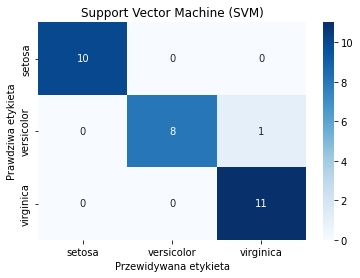

In [1]:
# Importowanie bibliotek
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Załadowanie przykładowego zbioru danych - Iris
from sklearn.datasets import load_iris
iris = load_iris()

# Konwersja do DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Podział danych na cechy (X) i etykiety (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Podział danych na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalowanie cech
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Trenowanie modelu SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Przewidywanie wartości na zestawie testowym
y_pred = svm.predict(X_test)

# Ocena modelu
print("Support Vector Machine (SVM)")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Wizualizacja macierzy błędów
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(title)
    plt.xlabel('Przewidywana etykieta')
    plt.ylabel('Prawdziwa etykieta')
    plt.show()

# Wyświetlanie macierzy błędów
plot_confusion_matrix(y_test, y_pred, 'Support Vector Machine (SVM)')